# Aim: validate a business idea by testing hypotheses.
Case study in brief: JetRail is setting up patented, new, high-speed public transport infrastructure. From a proof-of-concept run are passenges using this infrastructure? 

From the data made available from the preliminary run, we can hypothesize that passenger traffic:

1. will be higher from May to Oct: 
more public transport users in the warmer months in this US city.

2. will increase as the years progress: 
more people will use public transport when they learn/ are educated about its benefits.

3. will be higher during peak hours: 
public transport make be a more convenient option for people travelling to work/school.

4. will be lower on weekends: 
work/school-related travel will be lower on weekends.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from pandas import Series

import warnings

# Load data:

In [2]:
# Load provided training dataset
train=pd.read_csv(r"C:\Users\Ryan\Documents\courses- code\AnalyticsVidhya\Time Series Forecasting\data\Train_SU63ISt.csv")

In [3]:
# Load provided test dataset
test=pd.read_csv(r"C:\Users\Ryan\Documents\courses- code\AnalyticsVidhya\Time Series Forecasting\data\Test_0qrQsBZ.csv")

In [4]:
# preserve a copy as the 'original' dataframe
train_original=train.copy()
test_original=test.copy()

In [5]:
# Observe the data structure
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

# Feature Extraction:

In [7]:
# format the datetime column for data (and copies)
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
# separate the d,m,y & H

for i in (train, test, train_original, test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [9]:
train.head(2)  # verify the additional columns added and available for analysis

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1


# Hypothesis testing:

Hypothesis 1: passenger traffic will be higher from May to Oct

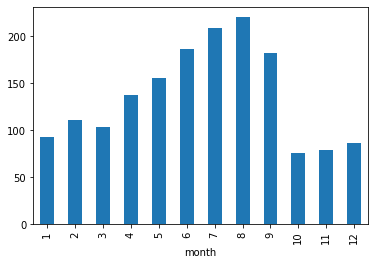

In [10]:
# Assess passenger count by month
train.groupby('month')['Count'].mean().plot.bar()

Indeed the passenger traffic is higher in the warmer US months.
However, the sudden drop in the count between Sept-Oct is unexpected.

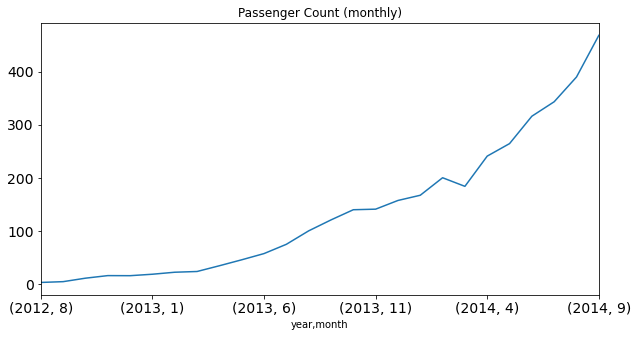

In [11]:
# plot the passenger count for the entire period of available data:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(10,5), title='Passenger Count (monthly)', fontsize=14)

The dataset ends Sept 2014, and does not contain Oct-Dec data for 2014. This explains the drop observed in the earlier plot for average passenger traffic in the months Oct-Dec.

Hypothesis 1: Validated. 

This observation serves as a suitable segway to hypothesis 2...

Hypothesis 2: traffic will increase as the years progress

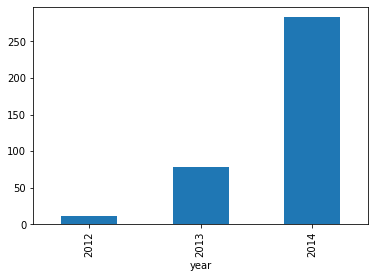

In [12]:
# assess passenger count by year
train.groupby('year')['Count'].mean().plot.bar()

Passenger counts increase steadily in time and year-to-year.

Hypothesis 2: validated.

Hypothesis 3: trafic will be higher during peak hours

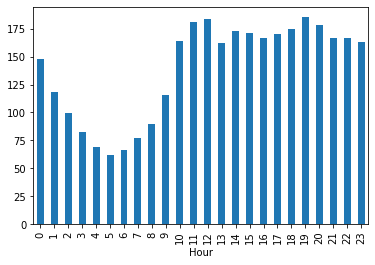

In [13]:
# determine mean hourly passenger count
train.groupby('Hour')['Count'].mean().plot.bar()

Peak traffic is between 10:00 to 20:00, then dips after midnight.

Hypothesis 3: validated

Hypothesis 4: weekend traffic will be less than weekdays.

In [14]:
# extract day of the week from Datetime.
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [15]:
# with Monday as 0, day 5 & 6 are the weekend
# assign weekends as 1, weekday 0
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

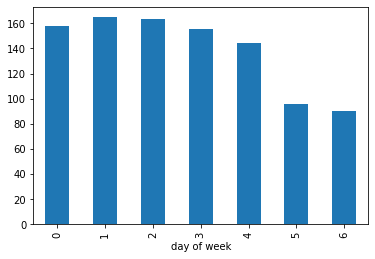

In [16]:
# determine the day-wise passenger count per week.

train.groupby('day of week')['Count'].mean().plot.bar()

Passenger count is higher on weendays and dips on weekends.

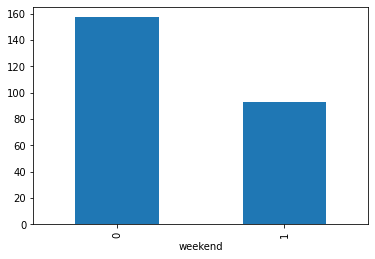

In [17]:
# This can also be estimated by averaging passengers across weekdays and weekends:
train.groupby('weekend')['Count'].mean().plot.bar()

Indeed weekend (1) traffic is lower than weekday (0).

Hypothesis 4: Validated.

The four hypotheses were validated.

Overall this suggested that the proposed business is viable as the public transport initiative is adopted by passengers. As expected, the number of passengers increases with time, possibly dues to increased awareness.

Additionally weekday users (presumably workers and students) are users.

Any deccrease in the passenger numbers can be explained by seasonality or completeness of the dataset.